In [1]:
from gans_utils import Generator, Discriminator
from gans_utils import train_wgan_gp, train_wgan_gp_
import numpy as np
import torch
import matplotlib.pyplot as plt
import torch.utils.data as data

In [2]:
def two_moons(n: int, sigma: float = 1e-1):
    theta = 2 * torch.pi * torch.rand(n, )
    label = (theta > torch.pi).float()

    x = torch.stack(
        (
            torch.cos(theta) + label - 1 / 2,
            torch.sin(theta) + label / 2 - 1 / 4,
        ),
        axis=-1,
    )

    return label, torch.normal(x, sigma)


labels, samples = two_moons(16384)

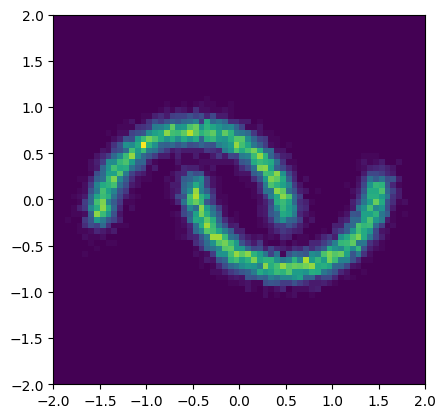

In [3]:
plt.figure(figsize=(4.8, 4.8))
plt.hist2d(*samples.T, bins=64, range=((-2, 2), (-2, 2)))
plt.show()

In [4]:
trainset = data.TensorDataset(*two_moons(16384))
trainloader = data.DataLoader(trainset, batch_size=64, shuffle=True)

In [5]:
generator = Generator(z_dim=256, c_dim=1, y_dim=2, hidden_dim=128, device='cpu')
discriminator = Discriminator(c_dim=1, y_dim=2, hidden_dim=128, device='cpu')
discriminator, generator, history = train_wgan_gp_(generator, discriminator, trainloader, d_lr=2e-4, epochs=100, gp_lambda=5, n_critic=10)

Epoch 1/100 | D: -0.5798 | G: 0.8079


Epoch 2/100 | D: -0.6726 | G: 0.5707


Epoch 3/100 | D: -0.5016 | G: -1.4158


Epoch 4/100 | D: -0.2611 | G: -3.9944


Epoch 5/100 | D: -0.0446 | G: -4.0204


Epoch 6/100 | D: -0.1276 | G: -4.2118


Epoch 7/100 | D: -0.2029 | G: -4.0906


Epoch 8/100 | D: -0.1944 | G: -3.7038


Epoch 9/100 | D: -0.1904 | G: -3.8013


Epoch 10/100 | D: -0.1839 | G: -3.4940


Epoch 11/100 | D: -0.1785 | G: -3.0924


Epoch 12/100 | D: -0.1749 | G: -2.9005


Epoch 13/100 | D: -0.1691 | G: -2.7019


Epoch 14/100 | D: -0.1621 | G: -2.5772


Epoch 15/100 | D: -0.1544 | G: -2.2675


Epoch 16/100 | D: -0.1435 | G: -2.1771


Epoch 17/100 | D: -0.1310 | G: -2.0920


Epoch 18/100 | D: -0.1174 | G: -2.1234


Epoch 19/100 | D: -0.1010 | G: -2.1886


Epoch 20/100 | D: -0.0792 | G: -2.2098


Epoch 21/100 | D: -0.0569 | G: -2.2426


Epoch 22/100 | D: -0.0374 | G: -2.0023


Epoch 23/100 | D: -0.0206 | G: -1.9440


Epoch 24/100 | D: -0.0629 | G: -1.3990


Epoch 25/100 | D: -0.0658 | G: -1.4138


Epoch 26/100 | D: -0.0433 | G: -1.9595


Epoch 27/100 | D: -0.0257 | G: -2.3896


Epoch 28/100 | D: 0.0130 | G: -2.3006


Epoch 29/100 | D: 0.0116 | G: -2.7610


Epoch 30/100 | D: 0.0438 | G: -3.5503


Epoch 31/100 | D: -0.0135 | G: -0.9982


Epoch 32/100 | D: 0.0237 | G: -2.7437


Epoch 33/100 | D: 0.0288 | G: -4.5000


Epoch 34/100 | D: 0.0275 | G: -4.0438


Epoch 35/100 | D: 0.0113 | G: -3.1441


Epoch 36/100 | D: 0.0028 | G: -1.2051


Epoch 37/100 | D: 0.1347 | G: -1.8638


Epoch 38/100 | D: 0.1957 | G: 0.1328


Epoch 39/100 | D: 0.1051 | G: -0.7806


Epoch 40/100 | D: 0.0313 | G: 0.3660


Epoch 41/100 | D: 0.0733 | G: -2.5594


Epoch 42/100 | D: 0.0316 | G: -2.1535


Epoch 43/100 | D: 0.0068 | G: 0.0512


Epoch 44/100 | D: 0.0499 | G: -0.8210


Epoch 45/100 | D: 0.0162 | G: -1.4251


Epoch 46/100 | D: 0.0293 | G: -0.0538


Epoch 47/100 | D: -0.0037 | G: -1.8200


Epoch 48/100 | D: 0.0226 | G: -1.6845


Epoch 49/100 | D: 0.0169 | G: -1.5021


Epoch 50/100 | D: 0.0253 | G: -1.4232


Epoch 51/100 | D: 0.0233 | G: -2.5761


Epoch 52/100 | D: 0.0434 | G: -1.2296


Epoch 53/100 | D: 0.0271 | G: -3.0422


Epoch 54/100 | D: 0.0751 | G: -1.2771


Epoch 55/100 | D: 0.0572 | G: -10.8543


Epoch 56/100 | D: 0.0279 | G: -7.3672


Epoch 57/100 | D: 0.0019 | G: -4.3644


Epoch 58/100 | D: 0.0310 | G: -6.8864


Epoch 59/100 | D: 0.0166 | G: -8.8835


Epoch 60/100 | D: 0.0224 | G: -5.6378


Epoch 61/100 | D: 0.0382 | G: -2.2492


Epoch 62/100 | D: 0.0236 | G: 1.5329


Epoch 63/100 | D: 0.0145 | G: 1.7647


Epoch 64/100 | D: 0.0044 | G: 1.4616


Epoch 65/100 | D: 0.0179 | G: -1.0758


Epoch 66/100 | D: 0.0170 | G: -0.8717


Epoch 67/100 | D: 0.0217 | G: -0.8285


Epoch 68/100 | D: 0.0167 | G: 0.2924


Epoch 69/100 | D: 0.0181 | G: 1.0385


Epoch 70/100 | D: 0.0373 | G: 0.1143


Epoch 71/100 | D: 0.0496 | G: 0.3004


Epoch 72/100 | D: -0.0027 | G: -1.8414


Epoch 73/100 | D: 0.0169 | G: -2.9366


Epoch 74/100 | D: 0.0161 | G: -2.5503


Epoch 75/100 | D: 0.0201 | G: -0.6542


Epoch 76/100 | D: 0.0173 | G: -0.6735


Epoch 77/100 | D: 0.0361 | G: -1.5481


Epoch 78/100 | D: 0.0085 | G: -0.9543


Epoch 79/100 | D: 0.0147 | G: -0.7778


Epoch 80/100 | D: 0.0114 | G: -0.9854


Epoch 81/100 | D: 0.0127 | G: -1.1526


Epoch 82/100 | D: 0.0054 | G: -1.4053


Epoch 83/100 | D: 0.0137 | G: -0.8097


Epoch 84/100 | D: 0.0273 | G: -1.7550


Epoch 85/100 | D: 0.0065 | G: -1.0194


Epoch 86/100 | D: 0.0146 | G: -1.0231


Epoch 87/100 | D: 0.0121 | G: -0.6371


Epoch 88/100 | D: 0.0164 | G: -1.0241


Epoch 89/100 | D: 0.0138 | G: -1.1747


Epoch 90/100 | D: 0.0151 | G: -1.3082


Epoch 91/100 | D: 0.0543 | G: -0.1421


Epoch 92/100 | D: 0.0291 | G: -0.3056


Epoch 93/100 | D: 0.0676 | G: -0.5571


Epoch 94/100 | D: 0.0587 | G: -1.0410


Epoch 95/100 | D: 0.0648 | G: -4.4549


Epoch 96/100 | D: 0.0915 | G: -5.8781


Epoch 97/100 | D: 0.0512 | G: -3.0063


Epoch 98/100 | D: 0.0573 | G: -2.5531


Epoch 99/100 | D: 0.0860 | G: -6.5331


Epoch 100/100 | D: 0.0352 | G: 5.8872


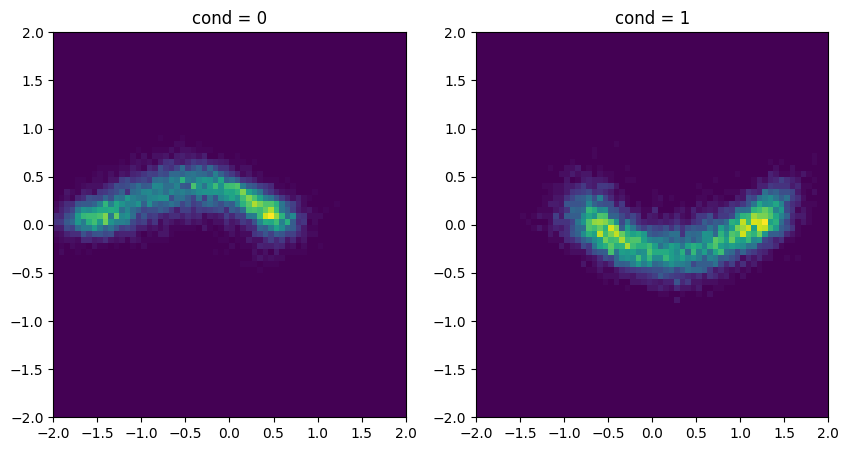

In [6]:
# Context dim = 1 (scalar condition)
c0 = torch.tensor([[0.0]])   # shape (1,1)
c1 = torch.tensor([[1.0]])   # shape (1,1)

# Generate samples separately
samps0 = generator.sample(10000, c0).view(-1, 2).cpu().numpy()
samps1 = generator.sample(10000, c1).view(-1, 2).cpu().numpy()

# Plot side by side
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].hist2d(*samps0.T, bins=64, range=((-2, 2), (-2, 2)))
axs[0].set_title("cond = 0")
axs[1].hist2d(*samps1.T, bins=64, range=((-2, 2), (-2, 2)))
axs[1].set_title("cond = 1")
plt.show()


In [7]:
# import torch.nn as nn
# from gans_utils import ensure_batch_context

# class Generator_linear(nn.Module):
#     """
#     Define Generator class.
#     Conditional generator using fully connected layers.
#     """

#     def __init__(self, **kwargs):

#         """
#         Generator constructor
#         :param latent_s: Dim of the latent space
#         :param cond_in: Dim of context (weather forecasts, etc)
#         :param hidden_layer: number of hidden layers
#         :param neurons_per_layer : number of neurons per hidden_layer
#         :param in_size: Dim of the random variable to model (PV, wind power, etc)
#         """

#         super(Generator_linear, self).__init__()
#         self.in_size = kwargs['in_size']   # Dim of the random variable to model (PV, wind power, etc)
#         self.cond_in = kwargs['cond_in']   # Dim of context (weather forecasts, etc)
#         self.latent_s = kwargs['latent_s'] # Dim of the latent space

#         # Set GPU if available
#         if kwargs['gpu']:
#             self.device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
#         else:
#             self.device = 'cpu'

#         l_gen_net = [self.latent_s + self.cond_in] + [kwargs['gen_w']] * kwargs['gen_l'] + [self.in_size]

#         # Build the generator
#         self.gen_net = []
#         for l1, l2 in zip(l_gen_net[:-1], l_gen_net[1:]):
#             self.gen_net += [nn.Linear(l1, l2), nn.ReLU()]
#         self.gen_net.pop() # Regression problem, no activation function at the last layer
#         self.gen = nn.Sequential(*self.gen_net)

    def to(self, device)
#         super().to(device)
#         self.device = device
#         return self

#     def forward(self, noise: torch.Tensor, context: torch.Tensor):
#         """
#         Define forward pass
#         :param noise: noise torch tensor
#         :param context: conditional torch tensor
#         :return: output torch tensor
#         """
#         context = ensure_batch_context(noise, context)
#         pred = self.gen(torch.cat((noise, context), dim=1))

#         return pred

#     def weights_initialize(self, mean: float, std: float):
#         """
#         Initialize self model parameters following a normal distribution based on mean and std
#         :param mean: mean of the standard distribution
#         :param std : standard deviation of the normal distribution
#         :return: None
#         """
#         for m in self.modules():
#             if isinstance(m, torch.nn.Linear):
#                 torch.nn.init.normal_(m.weight.data, mean=mean, std=std)

#     def sample(self, n_s=1, x_cond:np.array=None):
#         """
#         :param n_s: number of scenarios
#         :param x_cond: context (weather forecasts, etc) into an array of shape (self.cond_in,)
#         :return: samples into an array of shape (nb_samples, self.in_size)
#         """
#         # Generate samples from a multivariate Gaussian
#         z = torch.randn(n_s, self.latent_s).to(self.device)
#         context = torch.tensor(np.tile(x_cond, n_s).reshape(n_s, self.cond_in)).to(self.device).float()
#         scenarios = self.gen(torch.cat((z, context), dim=1)).view(n_s, -1).cpu().detach().numpy()

#         return scenarios


# class Discriminator_wassertein(nn.Module):
#     """
#     Define critic class, discriminator using Wasserstein distance estimate.
#     Return a positive number. Higher the output is, more realistic is the input.
#     """

#     def __init__(self, **kwargs):

#         """
#         Critic constructor
#         :param input_dim: size of the input (real or fake) torch tensor
#         :param condition_dim: size ot the conditional torch tensor
#         :param hidden_layer: number of hidden layer
#         :param neurons_per_layer : number of neurons per hidden layer
#         """
#         super(Discriminator_wassertein, self).__init__()

#         self.in_size = kwargs['in_size']   # Dim of the random variable to model (PV, wind power, etc)
#         self.cond_in = kwargs['cond_in']   # Dim of context (weather forecasts, etc)
#         self.latent_s = kwargs['latent_s'] # Dim of the latent space
#         self.lambda_gp = kwargs['lambda_gp']

#         # Set GPU if available
#         if kwargs['gpu']:
#             self.device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
#         else:
#             self.device = 'cpu'

#         l_dis_net = [self.in_size + self.cond_in] + [kwargs['gen_w']] * kwargs['gen_l'] + [1]

#         # Build the discriminator
#         alpha = 0.01
#         self.dis_net = []
#         for l1, l2 in zip(l_dis_net[:-1], l_dis_net[1:]):
#             self.dis_net += [nn.Linear(l1, l2), nn.LeakyReLU(alpha)]
#         self.dis_net.pop() # The last activation function is a ReLU to return a positive number
#         self.dis_net.append(nn.ReLU())
#         self.dis = nn.Sequential(*self.dis_net)

#     def loss(self, generated_samples: torch.Tensor, true_samples: torch.Tensor, context: torch.Tensor):

#         # Discriminator's answers to generated and true samples
#         D_true = self.forward(true_samples, context)
#         D_generated = self.forward(generated_samples, context)
#         # Compute Discriminator's loss with a gradient penalty to force Lipschitz condition
#         gp = self.grad_pen(real=true_samples, samples=generated_samples, context=context)
#         loss = -(torch.mean(D_true) - torch.mean(D_generated)) + self.lambda_gp * gp

#         return loss


#     def forward(self, input: torch.Tensor, context: torch.Tensor):
#         """
#         Define forward pass
#         :param input: input (real or fake) torch tensor
#         :param context: conditional torch tensor
#         :return: output torch tensor
#         """
#         context = ensure_batch_context(input, context)
#         pred = self.dis(torch.cat((input, context), dim=1))

#         return pred

#     def weights_initialize(self, mean: float, std: float):
#         """
#         Initialize self model parameters following a normal distribution based on mean and std
#         :param mean: mean of the standard distribution
#         :param std : standard deviation of the normal distribution
#         :return: None
#         """
#         for m in self.modules():
#             if isinstance(m, torch.nn.Linear):
#                 torch.nn.init.normal_(m.weight.data, mean=mean, std=std)

#     def grad_pen(self, real: torch.tensor, samples: torch.tensor, context: torch.Tensor):
#         """
#         For discriminator using Wasserstein distance estimate.
#         Compute gradient penalty to add to critic loss in order to force Lipschitz condition using batch
#         of interpolated sample. The Lipschitz constraint is obtained if the gradient is 1 on all interpolated
#         sample. The gradient penalty forces this condition.
#         :param real: batch of real samples, shape: batch_size * 24
#         :param samples: batch of generated sample, shape: batch_size * 24
#         :param context : batch of conditional torch tensor, shape: batch_size * 24
#         :return: gradient penalty
#         """

#         # Interpolated sample
#         bs, sample_size = real.shape[0], real.shape[1]
#         epsilon = torch.rand((bs, sample_size), device=self.device)
#         interpolated_sample = real * epsilon + samples * (1 - epsilon)
#         # Compute critic scores
#         mixed_score = self.forward(interpolated_sample, context)
#         # Gradient of the mixed_score with respect with the interpolated_sample
#         gradient = torch.autograd.grad(inputs=interpolated_sample,
#                                        outputs=mixed_score,
#                                        grad_outputs=torch.ones_like(mixed_score),
#                                        create_graph=True, retain_graph=True)[0]

#         gradient = gradient.view(gradient.shape[0], -1)
#         gradient_norm = gradient.norm(2, dim=1)
#         gradient_pen = torch.mean((gradient_norm - 1) ** 2)

#         return gradient_pen

IndentationError: unexpected indent (192807974.py, line 41)

In [ ]:
# generator = Generator_linear(in_size=2, cond_in=1, latent_s=256, gen_w=64*4, gen_l=2, gpu=False)
# discriminator = Discriminator_wassertein(in_size=2, cond_in=1, gen_w=64*4, gen_l=2, gpu=False, latent_s=256, lambda_gp=10)

In [ ]:
# generator.weights_initialize(mean=0, std=0.02)
# discriminator.weights_initialize(mean=0, std=0.02)

# g_optimizer = torch.optim.Adam(generator.parameters(), lr=1e-4, betas=(0.0, 0.9))
# d_optimizer = torch.optim.Adam(discriminator.parameters(), lr=1e-4, betas=(0.0, 0.9))

# discriminator.train()
# generator.train()
# device = next(generator.parameters()).device
# epochs = 20
# n_critic = 5

# for epoch in range(1, epochs + 1):
#     for i, (c_batch, y_real) in enumerate(trainloader):
#         c_batch = c_batch.to(device)
#         y_real = y_real.to(device)
#         batch_size = y_real.size(0)
#         # Train discriminator
#         for _ in range(n_critic):
#             z = torch.randn(batch_size, 256, device=device)
#             y_fake = generator.forward(z, c_batch)

#             loss_d = discriminator.loss(y_fake, y_real, c_batch)
#             d_optimizer.zero_grad()
#             loss_d.backward(retain_graph=True)
#             d_optimizer.step()

#         z = torch.randn(batch_size, 256, device=device)
#         y_fake = generator.forward(z, c_batch)
#         y_fake = generator(z, c_batch)
#         d_fake = discriminator(y_fake, c_batch)
#         g_loss = -d_fake.mean()

#         g_optimizer.zero_grad(set_to_none=True)
#         g_loss.backward()
#         g_optimizer.step()

#         if i % 100 == 0:
#             print(f'Epoch [{epoch}/{epochs}], Batch [{i}/{len(trainloader)}], '
#                     f'Disc. Loss: {loss_d.item():.4f}, Gen. Loss: {g_loss.item():.4f}')

In [ ]:
# samples = generator.sample(10000, torch.tensor([0.0]))
# plt.figure(figsize=(4.8, 4.8))
# plt.hist2d(*samples.T, bins=64, range=((-2, 2), (-2, 2)))
# plt.show()